<a href="https://colab.research.google.com/github/mvbaracho/DataMinning/blob/main/Agrupamento/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SETUP**

In [ ]:
#BIBLIOTECAS
#Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd
import seaborn as sns
import statistics
import datetime as dt
import calendar
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA

%matplotlib inline

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"138bRT5WPXfCdZj2fS_sMars4NlaQr75y"})
downloaded.GetContentFile('Sales2.csv')

In [ ]:
# CARREGANDO DB
df = pd.read_csv('Sales2.csv', sep=';', na_values='?')

df.head()

,Retailer,Pdv,Price,PaymentMethod,Timestamp,City,State
0,536329,137,0.15,1,2018-05-16 17:30:23.000,Pereira Barreto,SP
1,536329,136,1.38,1,2018-05-17 10:21:36.000,Pereira Barreto,SP
2,536329,135,1.00,1,2018-05-17 10:23:59.000,Pereira Barreto,SP
3,536329,135,10.00,1,2018-05-17 10:29:24.000,Pereira Barreto,SP
4,536329,136,0.79,1,2018-05-17 10:32:20.000,Pereira Barreto,SP


## **Pré-Processamento**

In [ ]:
#PRÉ-PROCESSAMENTO DA BASE DE DADOS

#sns.heatmap(df.isna())
df['Timestamp']= pd.to_datetime(df['Timestamp'],format='%Y-%m-%d')
df['year']= df['Timestamp'].dt.year
df['month']= df['Timestamp'].dt.month
df['day']= df['Timestamp'].dt.day
df['hour'] = df['Timestamp'].dt.hour
df['Weekday'] = df['Timestamp'].dt.day_name()
#df['PaymentMethod'] = np.where(df['PaymentMethod'] > 1, 'Credit Card', 'Cash')
#df['PeriodDay'] = np.where((df['hour'] > 0) & (df['hour']<=6), 0, 1)
b = [0,6,12,18,24]
l = [0, 1, 2,3]
df['session'] = pd.cut(df['hour'], bins=b, labels=l, include_lowest=True)
df = df.drop(columns=['Timestamp', 'Retailer', 'Pdv'])
df

,Price,PaymentMethod,City,State,year,month,day,hour,Weekday,session
0,0.15,1,Pereira Barreto,SP,2018,5,16,17,Wednesday,2
1,1.38,1,Pereira Barreto,SP,2018,5,17,10,Thursday,1
2,1.00,1,Pereira Barreto,SP,2018,5,17,10,Thursday,1
3,10.00,1,Pereira Barreto,SP,2018,5,17,10,Thursday,1
4,0.79,1,Pereira Barreto,SP,2018,5,17,10,Thursday,1
...,...,...,...,...,...,...,...,...,...,...
1801730,0.91,1,Ilha Solteira,SP,2021,7,15,9,Thursday,1
1801731,9.54,8,Fernandópolis,SP,2021,7,15,9,Thursday,1
1801732,9.74,8,São José do Rio Preto,SP,2021,7,15,9,Thursday,1
1801733,9.46,8,Pereira Barreto,SP,2021,7,15,9,Thursday,1


In [ ]:
# Pré-processamento -> LabelEncoder para transformar strings para inteiros
le = preprocessing.LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df['State'] = le.fit_transform(df['State'])
df['Weekday'] = le.fit_transform(df['Weekday'])
df['session'] = le.fit_transform(df['session'])

## **Técnica K-Means**

In [ ]:
#Início K-Means
# Inicializa o K-Means com 3 centroides randômicos
kmeans = KMeans(n_clusters = 3, init = 'random')
# Faz o agrupamento dos dados semelhantes
kmeans.fit(df)
# Obtém os centroides que foram gerados
centroids = kmeans.cluster_centers_
centroids

array([[1.41375468e+00, 4.17683957e+00, 5.40493886e+00, 9.67749972e-01,
        2.01967963e+03, 6.34824199e+00, 1.54352737e+01, 1.39999356e+01,
        2.94384041e+00, 1.71996644e+00],
       [1.40211565e+00, 4.01642533e+00, 5.30487948e+00, 9.75216129e-01,
        2.01956326e+03, 6.56469041e+00, 2.57706903e+01, 1.39590041e+01,
        2.88922671e+00, 1.71236139e+00],
       [1.47946438e+00, 4.17326366e+00, 5.35078875e+00, 9.67254517e-01,
        2.01969346e+03, 6.43013173e+00, 5.60111762e+00, 1.40109812e+01,
        2.95482830e+00, 1.72683912e+00]])

In [ ]:
# Pega cada registro e computa a distância pros centroides
distance = kmeans.fit_transform(df)
distance

array([[ 5.95157661, 11.42436692, 11.98296279],
       [ 5.93036029, 10.43145057, 12.76942866],
       [ 5.94468054, 10.43917473, 12.77803981],
       ...,
       [10.93933784, 15.40285521, 14.38753421],
       [10.4261484 , 15.0291933 , 13.99488462],
       [ 6.73841895, 12.63043284, 11.54718208]])

In [ ]:
# As labels possuem 3 classes diferentes sendo geradas corretamente
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

1 236330464.85809994
2 132201669.66427846
3 113185956.5134806
4 105365336.14222835
5 98029943.05280001
6 91311966.50649033
7 87903815.55832498
8 84046080.428486
9 80213997.40204945
10 76928758.6106915


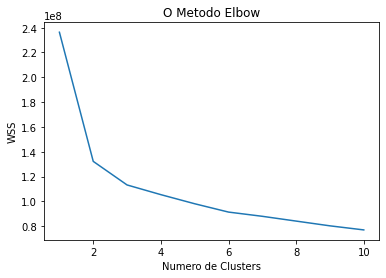

In [ ]:
# Método Elbow: verifica a quantidade ideal de clusters para o nosso problema
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(df)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1,11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

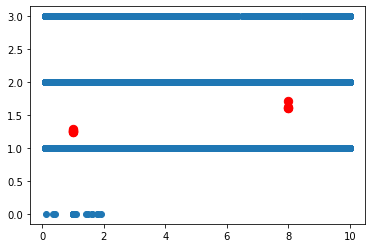

In [ ]:
plt.scatter(df.iloc[:,0], df.iloc[:,9]) #posicionamento dos eixos x e y
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()
# Usar gráfico de barras eixo x -> label (0,1,2,3)  X -> Qtd. de elementos p/grupo 

In [ ]:
df['Clusters'] = labels  #Criando a coluna relativa aos clusters

In [ ]:
df[df['Clusters'] == 8]

,Price,PaymentMethod,City,State,year,month,day,hour,Weekday,session,Clusters


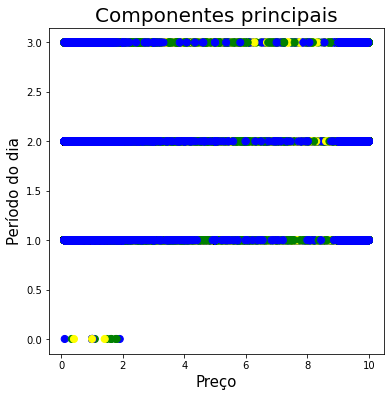

In [ ]:
# Plotando o gráfico: 3 cores representando 3 clusters diferentes
fig = plt.figure(figsize= (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Preço', fontsize = 15)
ax.set_ylabel('Período do dia', fontsize = 15)
ax.set_title('Componentes principais', fontsize = 20)

colors = np.array(["blue", "yellow", "green"])
ax.scatter(x=df.Price, y=df.session, c=colors[df.Clusters], s=50)
plt.show()

In [ ]:
df['Clusters'].value_counts()

2    625613
0    590015
1    586107
Name: Clusters, dtype: int64

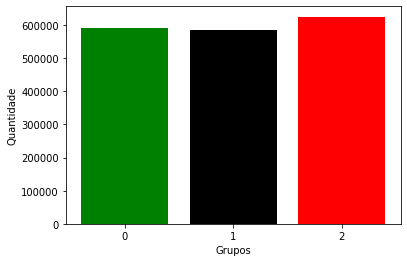

In [ ]:
plt.bar(df['Clusters'].value_counts().keys(), df['Clusters'].value_counts().values, color=['red', 'green', 'black'])
plt.xlabel('Grupos')
plt.ylabel('Quantidade')
plt.xticks([0,1,2])
plt.show()

## **K-means e PCA**

> Redução da dimensionalidade linear usando a decomposição de valores singulares dos dados para projetá-los em um espaço dimensional inferior.



In [ ]:
# Dropando a coluna clusters do K-means anterior
df = df.drop(columns='Clusters')
df

,Price,PaymentMethod,City,State,year,month,day,hour,Weekday,session
0,0.15,1,6,1,2018,5,16,17,6,2
1,1.38,1,6,1,2018,5,17,10,4,1
2,1.00,1,6,1,2018,5,17,10,4,1
3,10.00,1,6,1,2018,5,17,10,4,1
4,0.79,1,6,1,2018,5,17,10,4,1
...,...,...,...,...,...,...,...,...,...,...
1801730,0.91,1,3,1,2021,7,15,9,4,1
1801731,9.54,8,2,1,2021,7,15,9,4,1
1801732,9.74,8,8,1,2021,7,15,9,4,1
1801733,9.46,8,6,1,2021,7,15,9,4,1


In [ ]:
# Normalização dos dados -> Eliminação de discrepâncias

new_df = ((df - df.min()) / (df.max() - df.min()))
new_df

,Price,PaymentMethod,City,State,year,month,day,hour,Weekday,session
0,0.005051,0.0,0.545455,1.0,0.0,0.363636,0.500000,0.6875,1.000000,0.666667
1,0.129293,0.0,0.545455,1.0,0.0,0.363636,0.533333,0.2500,0.666667,0.333333
2,0.090909,0.0,0.545455,1.0,0.0,0.363636,0.533333,0.2500,0.666667,0.333333
3,1.000000,0.0,0.545455,1.0,0.0,0.363636,0.533333,0.2500,0.666667,0.333333
4,0.069697,0.0,0.545455,1.0,0.0,0.363636,0.533333,0.2500,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...
1801730,0.081818,0.0,0.272727,1.0,1.0,0.545455,0.466667,0.1875,0.666667,0.333333
1801731,0.953535,1.0,0.181818,1.0,1.0,0.545455,0.466667,0.1875,0.666667,0.333333
1801732,0.973737,1.0,0.727273,1.0,1.0,0.545455,0.466667,0.1875,0.666667,0.333333
1801733,0.945455,1.0,0.545455,1.0,1.0,0.545455,0.466667,0.1875,0.666667,0.333333


1 1554187.9307308611
2 1097104.1555633757
3 992917.1333077652
4 916028.0408085082
5 858317.1694237376
6 814481.3631872593
7 774485.2026392561
8 735408.1587192108
9 717615.4664424334
10 684678.2711567893


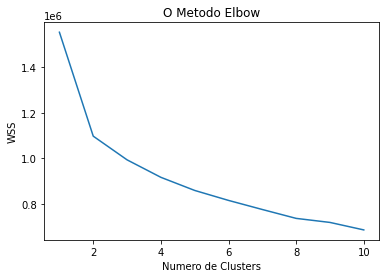

In [ ]:
#Método Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter=300)
    kmeans.fit(new_df)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [ ]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(new_df) #Aplica o KMeans para a base

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
new_df['Clusters'] = clustering.labels_ #Cria uma nova coluna de acordo com o cluster de cada registro
new_df

,Price,PaymentMethod,City,State,year,month,day,hour,Weekday,session,Clusters
0,0.005051,0.0,0.545455,1.0,0.0,0.363636,0.500000,0.6875,1.000000,0.666667,2
1,0.129293,0.0,0.545455,1.0,0.0,0.363636,0.533333,0.2500,0.666667,0.333333,2
2,0.090909,0.0,0.545455,1.0,0.0,0.363636,0.533333,0.2500,0.666667,0.333333,2
3,1.000000,0.0,0.545455,1.0,0.0,0.363636,0.533333,0.2500,0.666667,0.333333,2
4,0.069697,0.0,0.545455,1.0,0.0,0.363636,0.533333,0.2500,0.666667,0.333333,2
...,...,...,...,...,...,...,...,...,...,...,...
1801730,0.081818,0.0,0.272727,1.0,1.0,0.545455,0.466667,0.1875,0.666667,0.333333,1
1801731,0.953535,1.0,0.181818,1.0,1.0,0.545455,0.466667,0.1875,0.666667,0.333333,0
1801732,0.973737,1.0,0.727273,1.0,1.0,0.545455,0.466667,0.1875,0.666667,0.333333,0
1801733,0.945455,1.0,0.545455,1.0,1.0,0.545455,0.466667,0.1875,0.666667,0.333333,0


In [ ]:
#Técnica de PCA para obter as principais variáveis
#para entender melhor: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_newdf = pca.fit_transform(new_df)
pca_newdf
pca_final = pd.DataFrame(data = pca_newdf, columns= ['Componente_1', 'Componente_2']) #Seta as duas principais variáveis a agrupar
pca_final

,Componente_1,Componente_2
0,1.286430,-0.113603
1,1.293022,-0.106181
2,1.293796,-0.106049
3,1.275483,-0.109175
4,1.294223,-0.105976
...,...,...
1801730,0.310634,0.314103
1801731,-1.049830,-0.014700
1801732,-1.039701,-0.093203
1801733,-1.042643,-0.066961


In [ ]:
pca_df_final = pd.concat([pca_final, new_df[['Clusters']]], axis=1) # Concatena o pca_final com a coluna de Clusters do new_df
pca_df_final

,Componente_1,Componente_2,Clusters
0,1.286430,-0.113603,2
1,1.293022,-0.106181,2
2,1.293796,-0.106049,2
3,1.275483,-0.109175,2
4,1.294223,-0.105976,2
...,...,...,...
1801730,0.310634,0.314103,1
1801731,-1.049830,-0.014700,0
1801732,-1.039701,-0.093203,0
1801733,-1.042643,-0.066961,0


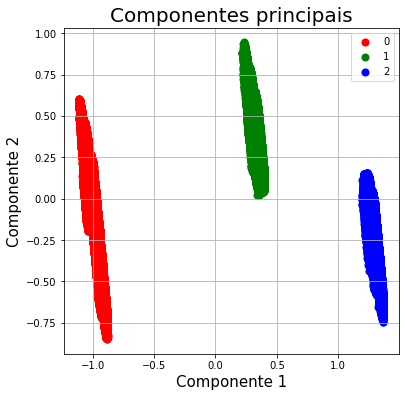

In [ ]:
fig = plt.figure(figsize= (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes principais', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df_final['Clusters'] == target
    ax.scatter(pca_df_final.loc[indicesToKeep, 'Componente_1']
               , pca_df_final.loc[indicesToKeep, 'Componente_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

## **K-Means utilizando apenas a relação Preço x Recorrência:  Agrupando em faixas de valores**

In [ ]:
novo = pd.DataFrame({'Price': df['Price'].value_counts().keys(), 'Qtd': df['Price'].value_counts().values})
novo

,Price,Qtd
0,1.00,30304
1,1.01,24811
2,1.02,23156
3,1.10,19621
4,1.05,18720
...,...,...
984,8.67,2
985,7.19,1
986,8.44,1
987,7.66,1


1 19103753873.015697
2 1860318441.7301517
3 951889864.5006932
4 943294695.9571286
5 378899854.9141609
6 373027697.4309408
7 342102392.0919703
8 341669416.21496767
9 341607423.3521217
10 187501000.3236152


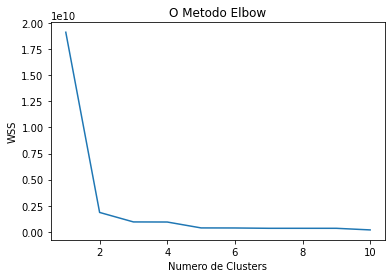

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(novo)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [ ]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(novo) #Aplica o KMeans para a base

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
novo['Cluster'] = clustering.labels_
novo

,Price,Qtd,Cluster
0,1.00,30304,1
1,1.01,24811,1
2,1.02,23156,1
3,1.10,19621,1
4,1.05,18720,1
...,...,...,...
984,8.67,2,0
985,7.19,1,0
986,8.44,1,0
987,7.66,1,0


In [ ]:
centroides = clustering.cluster_centers_
centroides

array([[5.96471910e+00, 6.63970037e+01],
       [1.48627451e+00, 1.41149706e+04],
       [6.87325581e-01, 3.59097674e+03]])

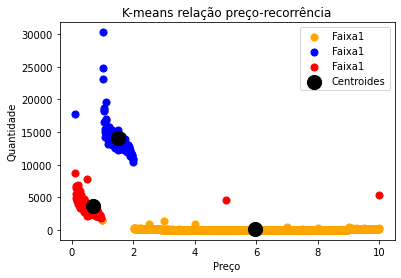

In [ ]:
plt.scatter(novo.loc[novo['Cluster'] == 0, ['Price']], novo.loc[novo['Cluster'] == 0, ['Qtd']], s=50, c='orange', label='Faixa1')
plt.scatter(novo.loc[novo['Cluster'] == 1, ['Price']], novo.loc[novo['Cluster'] == 1, ['Qtd']], s=50, c='blue', label='Faixa1')
plt.scatter(novo.loc[novo['Cluster'] == 2, ['Price']], novo.loc[novo['Cluster'] == 2, ['Qtd']], s=50, c='red', label='Faixa1')
plt.scatter(centroides[:,0],centroides[:,1], s = 200, c = 'black', label='Centroides') #posição de cada centroide no gráfico
plt.title('K-means relação preço-recorrência')
plt.xlabel('Preço')
plt.ylabel('Quantidade')
plt.legend()
plt.show()

## **DBSCAN**

In [ ]:
# EPS: é a distância máxima entre dois pontos pra que sejam considerados vizinhos |
# min_samples: quantidade de amostras em uma vizinhança pra um ponto ser considerado um ponto central 
db = DBSCAN(eps=1.2, min_samples=7)
db.fit(df[:10000])
db

DBSCAN(algorithm='auto', eps=1.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=None, p=None)

In [ ]:
labels = db.labels_

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
# n_noise representa a quantidade de amostras ruidosas: amostras ruidosas são pontos que não se enquadram em nenhum cluster
print('Estimated number of noise points: %d' % n_noise_)
# Coeficiente que mede a distância média entre uma amostra e um cluster ao qual ela não pertence
# O índice de Silhouette varia entre -1 e 1
#Índice de Silhouette: Valores próximos a 0 indicam clusters sobrepostos
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df[:10000], labels))

Estimated number of clusters: 124
Estimated number of noise points: 321
Silhouette Coefficient: 0.243


In [ ]:
#Lista de labels
unique_labels = list(set(labels))

#lista de quantidade de label
l = []
labels = list(labels)
for i in unique_labels: 
  l.append(labels.count(i))

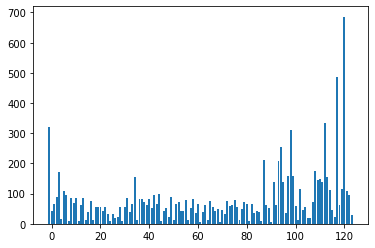

In [ ]:
# GRÁFICO #
plt.bar(unique_labels, l)
plt.show()